In [1]:
import os, sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib_venn import venn3
import subprocess
import seaborn as sns

In [2]:
DatscanSNPs = ["exm2269501","rs10813028"]

with open('Data/CHR_Filtered/DAtscanSNPs.txt', 'w') as f:
    for item in DatscanSNPs:
        f.write("%s\n" % item)

In [3]:
!plink --bfile Data/QC/White_2 --extract Data/CHR_Filtered/DAtscanSNPs.txt --make-bed --out Data/CHR_Filtered/DATSCAN

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/DATSCAN.log.
Options in effect:
  --bfile Data/QC/White_2
  --extract Data/CHR_Filtered/DAtscanSNPs.txt
  --make-bed
  --out Data/CHR_Filtered/DATSCAN

32768 MB RAM detected; reserving 16384 MB for main workspace.
128957 variants loaded from .bim file.
475 people (312 males, 163 females) loaded from .fam.
--extract: 1 variant remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 475 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
1 variant and 475 people pass filters and QC.
Note: No phenotypes present.
--make-bed to Data/CHR_Filtered/DATSCAN.bed + Data/CHR

In [4]:
# from binary to ped/map
!plink --bfile Data/CHR_Filtered/DATSCAN --recode --tab --out Data/CHR_Filtered/PED_DATSCAN

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/PED_DATSCAN.log.
Options in effect:
  --bfile Data/CHR_Filtered/DATSCAN
  --out Data/CHR_Filtered/PED_DATSCAN
  --recode
  --tab

Note: --tab flag deprecated.  Use "--recode tab ...".
32768 MB RAM detected; reserving 16384 MB for main workspace.
1 variant loaded from .bim file.
475 people (312 males, 163 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 475 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%

In [5]:
!plink --file Data/CHR_Filtered/PED_DATSCAN --recode AD --out Data/CHR_Filtered/PED_DATSCAN_recoded

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/PED_DATSCAN_recoded.log.
Options in effect:
  --file Data/CHR_Filtered/PED_DATSCAN
  --out Data/CHR_Filtered/PED_DATSCAN_recoded
  --recode AD

32768 MB RAM detected; reserving 16384 MB for main workspace.
.ped scan complete (for binary autoconversion).
Performing single-pass .bed write (1 variant, 475 people).
--file: Data/CHR_Filtered/PED_DATSCAN_recoded-temporary.bed +
Data/CHR_Filtered/PED_DATSCAN_recoded-temporary.bim +
Data/CHR_Filtered/PED_DATSCAN_recoded-temporary.fam written.
1 variant loaded from .bim file.
475 people (312 males, 163 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 475 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%1

In [6]:
dat = pd.read_csv("Data/CHR_Filtered/PED_DATSCAN_recoded.raw",sep=" ")
dat

,FID,IID,PAT,MAT,SEX,PHENOTYPE,exm2269501_T,exm2269501_HET
0,3000,3000,0,0,2,-9,1,1
1,3001,3001,0,0,1,-9,0,0
2,3002,3002,0,0,2,-9,1,1
3,3004,3004,0,0,1,-9,1,1
4,3006,3006,0,0,2,-9,0,0
...,...,...,...,...,...,...,...,...
470,4124,4124,0,0,1,-9,1,1
471,4125,4125,0,0,1,-9,1,1
472,4126,4126,0,0,1,-9,1,1
473,4136,4136,0,0,1,-9,1,1


In [7]:
DATScan = pd.read_csv("../Imaging/DATScan_Norm.csv")
images = DATScan.iloc[:,np.r_[0,3:7]]
images = images.groupby('PATNO').first().reset_index()
images

,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
0,3000,2.99,3.43,2.328620,1.973532
1,3001,1.56,1.12,-0.246956,-0.796382
2,3002,2.13,2.28,0.255480,0.339528
3,3003,2.19,1.27,-0.118658,-0.401457
4,3004,5.09,5.30,2.949289,2.400680
...,...,...,...,...,...
990,75484,1.35,1.24,-0.765017,-1.158726
991,75505,1.90,1.66,0.065569,-0.486548
992,75524,1.36,1.76,-0.665445,0.269728
993,75537,1.46,1.03,0.065569,-1.070600


In [8]:
info_dat = dat.merge(images, left_on=['FID'], right_on=['PATNO'])
info_dat

,FID,IID,PAT,MAT,SEX,PHENOTYPE,exm2269501_T,exm2269501_HET,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
0,3000,3000,0,0,2,-9,1,1,3000,2.99,3.43,2.328620,1.973532
1,3001,3001,0,0,1,-9,0,0,3001,1.56,1.12,-0.246956,-0.796382
2,3002,3002,0,0,2,-9,1,1,3002,2.13,2.28,0.255480,0.339528
3,3004,3004,0,0,1,-9,1,1,3004,5.09,5.30,2.949289,2.400680
4,3006,3006,0,0,2,-9,0,0,3006,2.28,2.12,0.175997,-2.400680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,4124,4124,0,0,1,-9,1,1,4124,1.95,1.59,-0.273727,-0.053985
471,4125,4125,0,0,1,-9,1,1,4125,2.03,2.47,0.391926,1.005487
472,4126,4126,0,0,1,-9,1,1,4126,1.54,1.88,-0.219232,-1.158726
473,4136,4136,0,0,1,-9,1,1,4136,0.68,0.57,-1.406477,-1.922162


In [11]:
snps = info_dat.columns[6:8].to_list()
snps

['exm2269501_T', 'exm2269501_HET']

In [14]:
phenotype = info_dat.columns[9:14].to_list()
phenotype

['CAUDATE_R', 'CAUDATE_L', 'PUTAMEN_R', 'PUTAMEN_L']

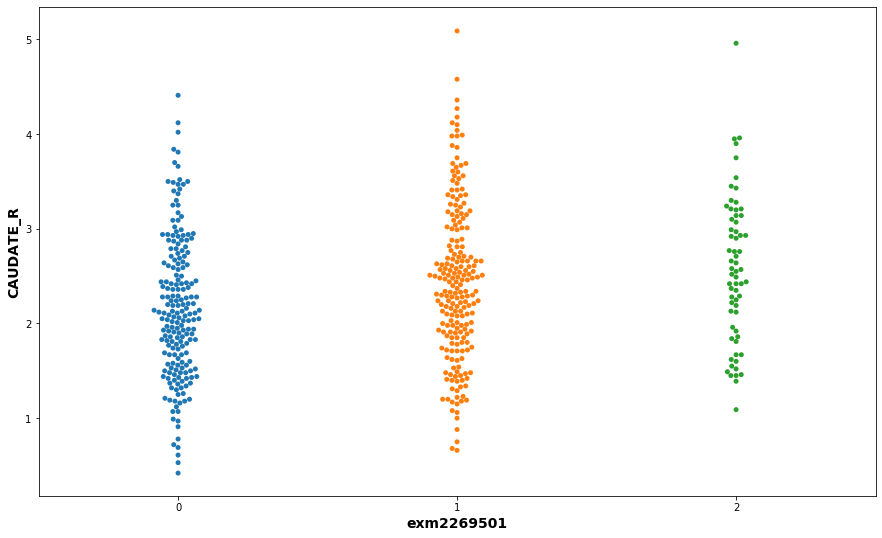

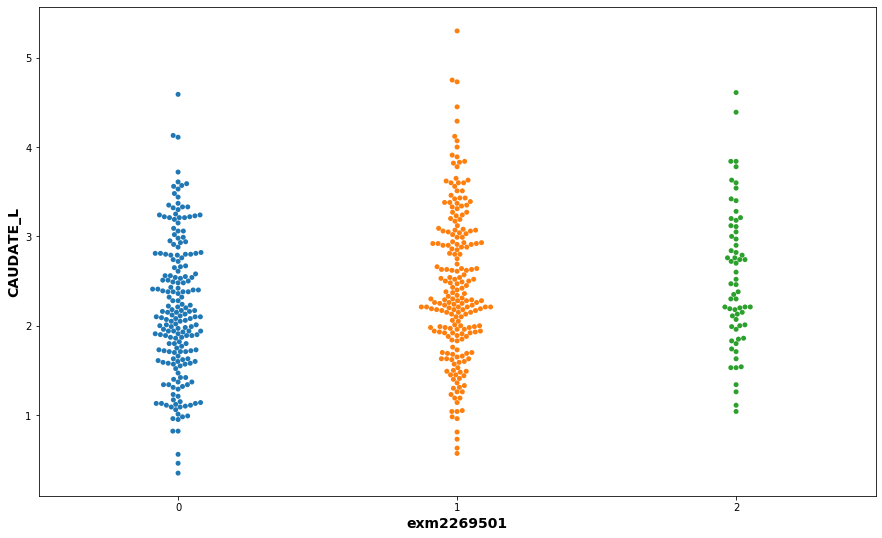

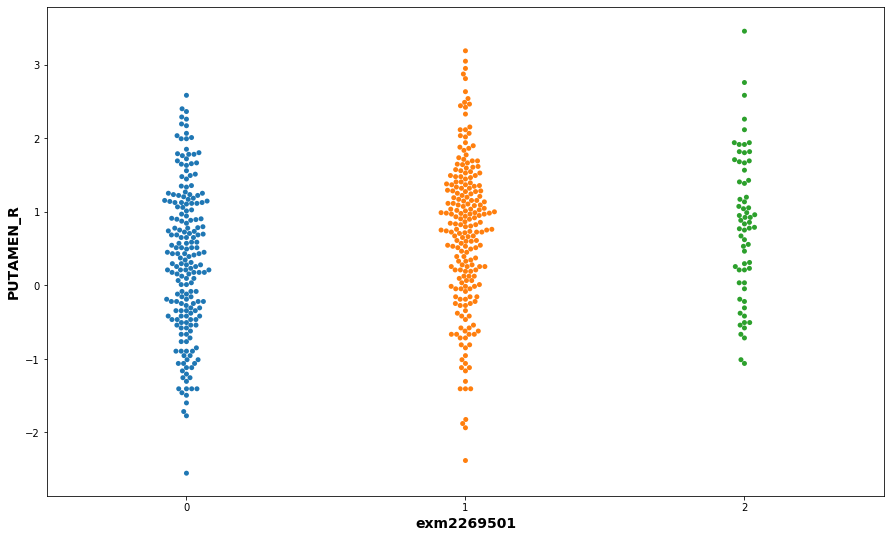

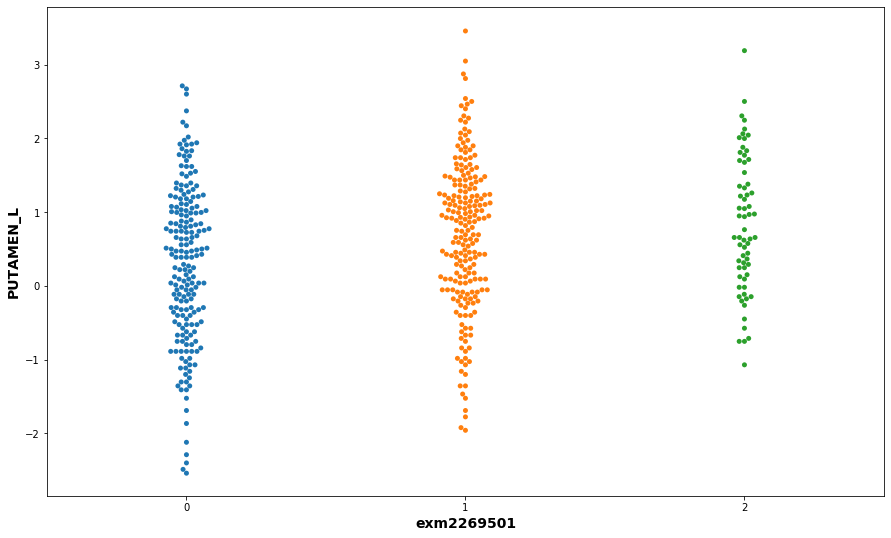

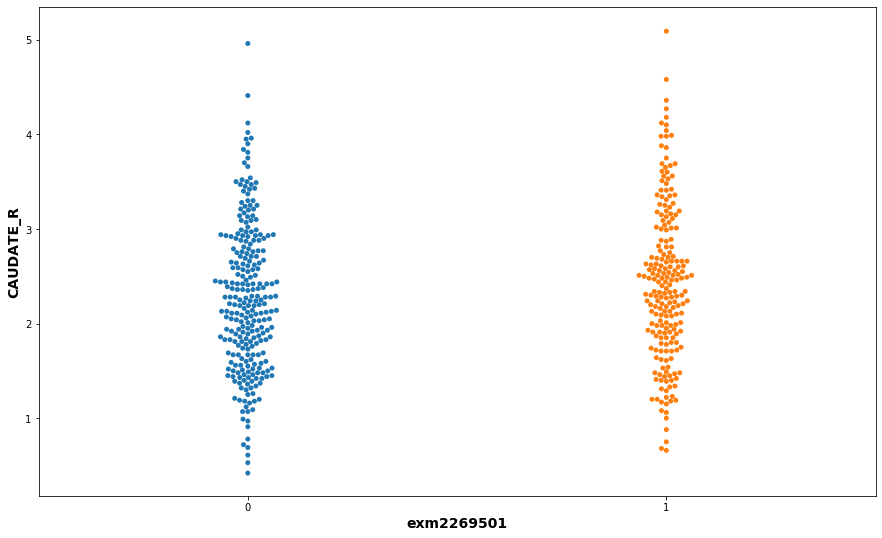

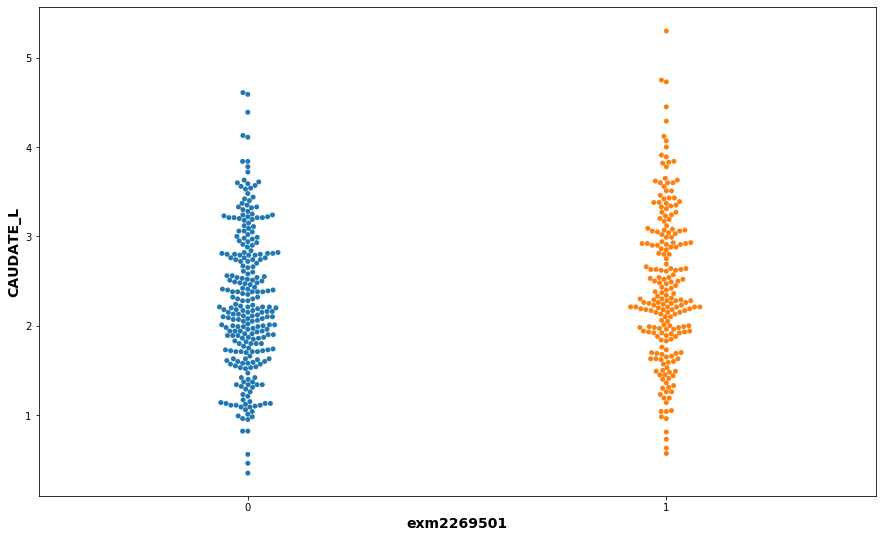

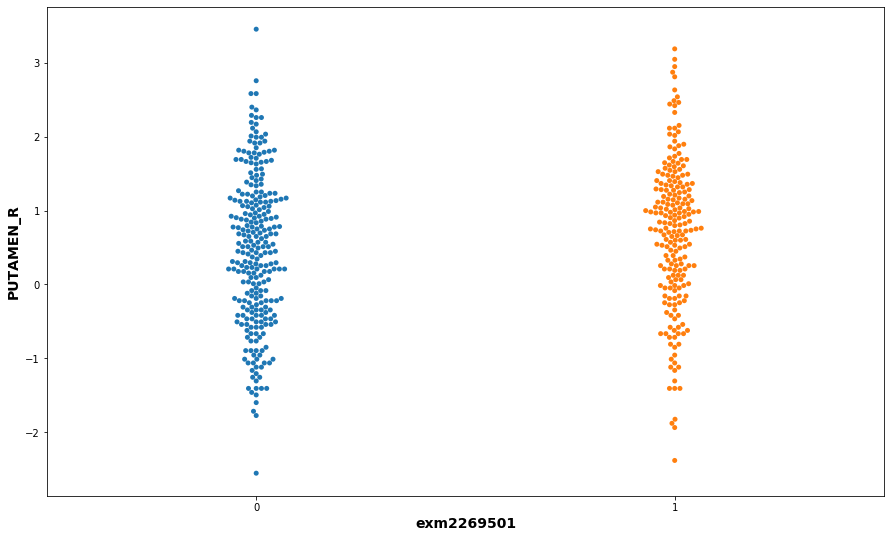

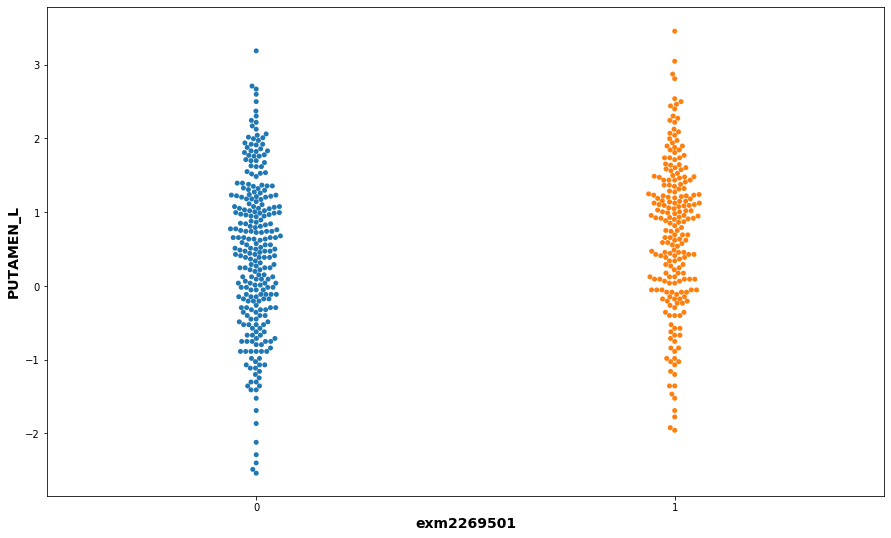

In [15]:
sep = '_'

for i in snps:
    name = i.split(sep, 1)[0]
    for j in phenotype:
        plt.figure(figsize=(15,9))
        sns.swarmplot(x=i, y=j, data=info_dat)
        plt.xlabel(name,fontweight="bold",fontsize=14)
        plt.ylabel(j,fontweight="bold",fontsize=14)
        plt.savefig("Data/CHR_Filtered/Beeswarm plot/DATSCAN/"+name+"_"+j+".png", bbox_inches='tight', dpi=600)